# Cubic Regularization Tutorial

Here is a quick tutorial on how to use this Cubic Regularization algorithm implementation implemented as part of a research internship in LJK Grenoble lab, supervised by Anatoli Juditsky.

1. Cubic Regularization
2. Examples on simple functions
3. Quadratic objective with quadratic equality constraints
4. Solving the auxiliary problem

References:
* Nesterov, Y., & Polyak, B. T. (2006). Cubic regularization of Newton method and its global performance.
  Mathematical Programming, 108(1), 177-205.
* https://github.com/cjones6/cubic_reg

In [1]:
%%capture
import src.example
import numpy as np
from src.cubic_approx import plot_approximations
from src.quadratic_obj import test_quadratic_obj
from src.test_one_dim import test_one_dim
from src.test_aux_methods import test_aux_methods

np.random.seed(1)

### 1 Cubic Regularization
Cubic regularization algorithm consists of finding an upper cubic approximation of the function with an appropriate $M$ term and choosing the next point by minimizing this approximation while staying close to the current point. In other words, when an appropriate $M$ is found using a line search approach, choosing the next point consists of solving the following auxiliary problem which reduces to a one-dimensional minimization problem and is solved using one of the two methods mentioned in section <strong>4</strong>.

$$
\underset{y}{\operatorname{\argmin}}\ \left[\left\langle f^{\prime}(x), y-x\right\rangle+\frac{1}{2}\left\langle f^{\prime \prime}(x)(y-x), y-x\right\rangle+\frac{M}{6}\|y-x\|^3\right]\     (1)
$$

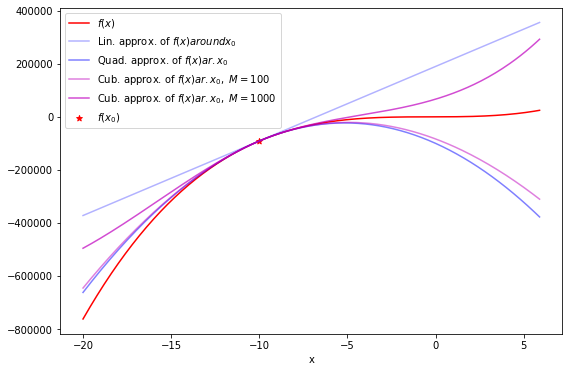

In [2]:
f = lambda x: 1e2*(x+x**2+x**3)
grad_f = lambda x: 1e2*(1+2*x+3*x**2)
plot_approximations(f, grad_f)

### 2 Examples
A few example functions are solved using two available methods for the auxiliary one-dimensional problem, more functions can be found, added and tested in <em>example.py</em>.

$$
  f(x, y)=x^2+y^2
$$

Value of function at argmin: 4.664676352064428e-26
Argmin of function: [1.52719946e-13 1.52719946e-13]
Number of iterations: 2


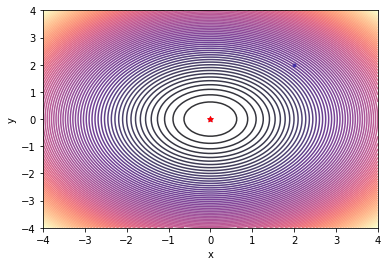

In [3]:
# Minimizing a convex quadratic function using the monotone norm method to solve the auxiliary problem.
src.example.main(function='quadratic', aux_method='monotone_norm')

$$
  f(x, y) = -(x^2 + 3\cdot y^2) \cdot e^{1-x^2-y^2}
$$

Value of function at argmin: -3.0
Argmin of function: [2.95533678e-15 1.00000000e+00]
Number of iterations: 6


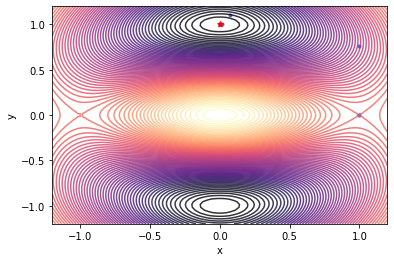

In [4]:
# Minimizing a bimodal function using the trust region method to solve the auxiliary problem, starting at a saddle point.
src.example.main(function='bimodal', aux_method='trust_region')

$$
\begin{aligned}
  &f(x, y) = (a - x)^2 + b\cdot (y - x^2)^2\\
  &a = 1,\ b = 100
\end{aligned}
$$

Value of function at argmin: 5.127595883936577e-30
Argmin of function: [1. 1.]
Number of iterations: 21


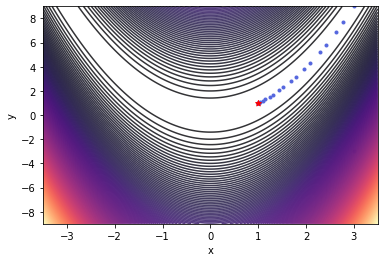

In [5]:
# Minimizing the non-convex Rosenbrock banana function with global minimum at (1,1).
src.example.main(function='banana', aux_method='trust_region')

$$
  f(x, y) = -20\cdot e^{-0.2 \sqrt{0.5 (x^2+y^2)}} - e^{0.5(\cos 2\pi x + \cos 2 \pi y)} + e + 20
$$

Value of function at argmin: 4.440892098500626e-16
Argmin of function: [ 3.46056517e-17 -9.47260912e-17]
Number of iterations: 14


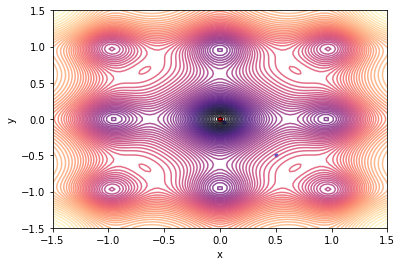

In [6]:
# Minimizing the Ackley non-convex function with global minimum at (0,0).
src.example.main(function='ackley', aux_method='monotone_norm')

### 3 Quadratic objective
We want to recover a vector $x = (x_1, ..., x_n)$ which minimizes an objective $f(x)$ with equality constraints where $A$ is an $n \times n$ matrix and $c$ a scalar:
$$
    f(x) = x^T\ A\ x - c\\
    x_i = x_{i-1}\cdot x_1,\   i=2,\dots,n
$$
We reformulate this to solving the following optimization problem: 
$$
    \underset{x}{\operatorname{\argmin}}\ F(x)=\left(\sum_{i=1}^{n}\sum_{j=1}^{n} A_{i,j}\cdot x_{i}\cdot x_{j} - c\right)^2 + \lambda \sum_{i=2}^{n} \left(x_{i}-x_{i-1}\cdot x_1\right)^2\     (2)
$$
In order to be able to verify the performance of cubic regularization on this problem we set $A_{i,j}$ to $0$ and $n$ odd, which results in the polynomial of the first term to have at least one real root and the global minimum of the function $f(x^*)=0$. This allows to check how close the obtained result is to the global minimum.

In [7]:
A = np.array([[-0.62169316,0.57449907,5.8095014],[0.57449907,7.49970533,2.57225283],[5.8095014,2.57225283,0.]])
c = -5.509167256191654
test_quadratic_obj(n=3, A=A, c=c, lambd=1, nb_minima=1)

Objective value: 12.594673221760937 , iterations: 10000 , experiment: 0 
Argmin x*: [ 1.44015527  0.03544584 -2.84884699]
Number of local minima found: 1 , best local minimum: 12.59


The fact that the constraint is simply specifying that the vector is a power series means that $F(x)$ only depends on $x_1$ and allows to solve the one-dimensional version of the problem to have another point of reference for the accuracy of a given solution.<br /><br />
The $\lambda$ term is a hyper-parameter that controls the "importance" of constraints, it is set to $1$ by default and is sometimes helpful to find a more accurate solution for given $A$ and $c$. It needs to be tuned for a specific problem, e.g. when the equality constraints are not satisifed and the second part of the objective is far from $0$.

Objective value of the n-D quad. objective: 2412.974066607829 argmin: [ 0.47217634  0.07265234 -0.24740327]
Objective value of the 1-D quad. objective: 5.190404887570323e-08 argmin: [-3.69861753]


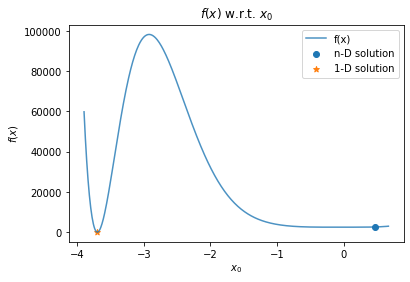

In [8]:
# Starting at a random point.
test_one_dim(n=3, A=A, c=c, lambd=1e3)

Objective value of the n-D quad. objective: 6.235440584792757e-25 argmin: [ -3.69861776  13.67977332 -50.59625253]
Objective value of the 1-D quad. objective: 3.110817812154429e-08 argmin: [-3.69861794]


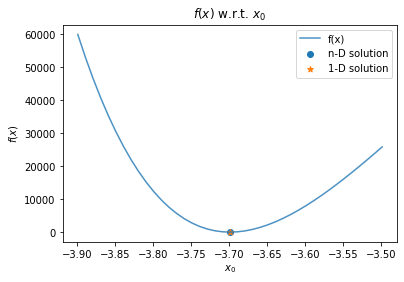

In [9]:
# Starting close to the global minimum.
x0=np.array([-5, 9, -30])
test_one_dim(n=3, A=A, c=c, x0=x0, lambd=1e4)

### 4 Auxiliary problem
#### Monotone norm method

Let us note the auxiliary problem (eq. $(1)$) as follows
$$
\underset{t}{\operatorname{\argmin}}\ \left[\xi^T\ t + \frac{1}{2} t^T\ H\ t + \mu\lVert t\rVert_2^3\right]
$$
Let the orthogonal decomposition of the hessian $H=\Gamma^T\Lambda\Gamma$, $u=\Gamma t$ and $\eta =\Gamma\xi$.<br />
Let $\lambda_1 \leq \lambda_2 \leq \dots \leq \lambda_n$ the eigenvalues of $H$, we reformulate the above as
$$
\underset{u}{\operatorname{\argmin}}\ \left[\eta^T\ u + \frac{1}{2} \sum_{i=1}^n u_i^2 \lambda_i + \mu\lVert u\rVert_2^3\right]\     (3)
$$
Setting the gradient of eq. $(3)$ to $0$ we get
$$
u_i = \frac{-\eta_i}{\lambda_i+3\mu \lVert u\rVert_2}
$$
If we set all $\lambda_i\geq\epsilon$, we can find $v = \lVert u\rVert_2$ as a root of a monotone decreasing function 
$$
g(v) = \sqrt{\sum_{i=1}^n \frac{-\eta_i}{\lambda_i+3\mu v^2}} - v
$$
In this implementation, Newton's method is used to find $v$.<br /><br />

We compare two methods for solving the auxiliary problem (eq. $(1)$). The <strong>Monotone norm</strong> method is described above while the <strong>Trust region</strong> method can be found in <em>Gould, N. I., Lucidi, S., Roma, M., & Toint, P. L. (1999). Solving the trust-region subproblem using the Lanczos method. SIAM Journal on Optimization, 9(2), 504-525</em>.

Did not converge to a local minimum, likely a saddle point or gradient very small.
Convergence criteria not met, likely due to round-off error or ill-conditioned Hessian.
Did not converge to a local minimum, likely a saddle point or gradient very small.
Did not converge to a local minimum, likely a saddle point or gradient very small.
Did not converge to a local minimum, likely a saddle point or gradient very small.
Did not converge to a local minimum, likely a saddle point or gradient very small.
Convergence criteria not met, likely due to round-off error or ill-conditioned Hessian.
Did not converge to a local minimum, likely a saddle point or gradient very small.
Did not converge to a local minimum, likely a saddle point or gradient very small.
Did not converge to a local minimum, likely a saddle point or gradient very small.
Did not converge to a local minimum, likely a saddle point or gradient very small.
Did not converge to a local minimum, likely a saddle point or gradient very s

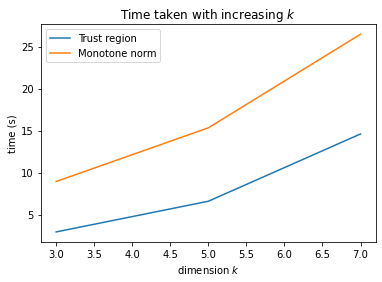

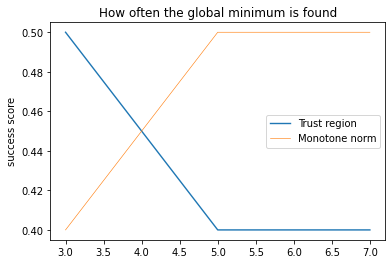

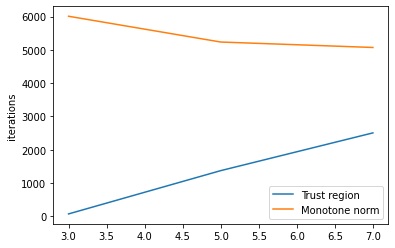

In [10]:
test_aux_methods(nb_experiments=10, high_dim=9)

Value of function at argmin: 120.60426739702395
Argmin of function: [-2.56845406  4.78582915]
Number of iterations: 10000


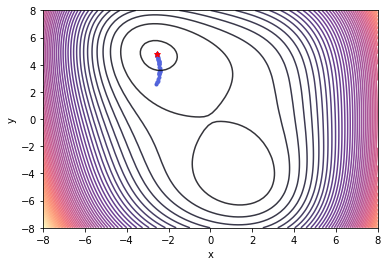

In [12]:
# Genereting and minimizing some funky 2D polynomials. Run this multiple times!
src.example.main(function='polynomial', aux_method='monotone_norm')